In [ ]:
!pip install sidpy
!pip install --upgrade jax==0.2.25  # currently, gpax doesn't work with jax-0.2.26
!pip install -q git+https://github.com/ziatdinovmax/gpax.git

  Using cached jax-0.2.25-py3-none-any.whl
  Attempting uninstall: jax
    Found existing installation: jax 0.4.19
    Uninstalling jax-0.4.19:
      Successfully uninstalled jax-0.4.19
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.7 requires jax>=0.4.6, but you have jax 0.2.25 which is incompatible.
flax 0.7.4 requires jax>=0.4.2, but you have jax 0.2.25 which is incompatible.
gpax 0.1.1 requires jax>=0.4.8, but you have jax 0.2.25 which is incompatible.
numpyro 0.13.2 requires jax>=0.4.14, but you have jax 0.2.25 which is incompatible.
orbax-checkpoint 0.4.1 requires jax>=0.4.9, but you have jax 0.2.25 which is incompatible.


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os
import h5py
import sidpy
from typing import Dict

In [ ]:
# Download data
!pip install -U gdown
!gdown https://drive.google.com/uc?id=1EEZmouZOPmkgNi7bbf-nDMlNFSaxg7OW

Downloading...
From (uriginal): https://drive.google.com/uc?id=1EEZmouZOPmkgNi7bbf-nDMlNFSaxg7OW
From (redirected): https://drive.google.com/uc?id=1EEZmouZOPmkgNi7bbf-nDMlNFSaxg7OW&confirm=t&uuid=4f852ef8-369d-46ea-8250-f3df9756bda6
To: /content/data/ZMO_Mg140_20230429/data.zip
100% 7.34G/7.34G [00:25<00:00, 286MB/s]


In [ ]:
# unzip data

from zipfile import ZipFile

# specifying the zip file name
file_name = "/content/data.zip"

# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zipfile:
    # printing all the contents of the zip file
    # zip.printdir()

    # extracting all the files
    print('Extracting all the files now...')
    zipfile.extractall()
    print('Done!')

Extracting all the files now...
Done!


# **Directory of dataset**

In [ ]:
dir_Mg140_high = "/content/data/ZMO_Mg140_20230426"
dir_Mg140_low = "/content/data/ZMO_Mg140_20230429"

dir_Mg110_high = "/content/data/data1_Mg110_40_70V"
dir_Mg110_low = "/content/data/data3_Mg110_5_40V"

dir_Mg80_high = "/content/data/data5_Mg80_40_70V"
dir_Mg80_low = "/content/data/data6_Mg80_5_40V"

# High throughput experiments

Extract data

In [ ]:
count_imgs = 208

# get Mg140 data
os.chdir(dir_Mg140_high)
amp_all = np.zeros((count_imgs, 58, 58))
pha_all = np.zeros((count_imgs, 58, 58))
fre_all = np.zeros((count_imgs, 58, 58))
topo_all = np.zeros((count_imgs, 58, 58))

for i in range (count_imgs):
  h5 = h5py.File('ZMO_Mg140_Domain_Writing_{}.hf5'.format(i), 'r+')
  be_qf = h5["BE Quick_Fitting/BEPFM quick fitting/BEPFM quick fitting"]
  be_ch = h5["Channels/BEPFM Channels/BEPFM Channels"]
  c = 6
  amp_all[i,] = be_qf[3:-3,:-6,0]
  pha_all[i,] = be_qf[3:-3,:-6,3]
  fre_all[i,] = be_qf[3:-3,:-6,1]
  topo_all[i,] = be_ch[0,3:-3,:-6, 0]

amp_140 = (amp_all-amp_all.min())/amp_all.ptp()
topo_140 = (topo_all - topo_all.min())/topo_all.ptp()
pha_140 = (pha_all - pha_all.min())/pha_all.ptp()

# get Mg110 data
os.chdir(dir_Mg110_high)
amp_all = np.zeros((count_imgs, 58, 58))
pha_all = np.zeros((count_imgs, 58, 58))
fre_all = np.zeros((count_imgs, 58, 58))
topo_all = np.zeros((count_imgs, 58, 58))

for i in range (count_imgs):
  h5 = h5py.File('ZMO_Mg110_Domain_Writing_{}.hf5'.format(i), 'r+')
  be_qf = h5["BE Quick_Fitting/BEPFM quick fitting/BEPFM quick fitting"]
  be_ch = h5["Channels/BEPFM Channels/BEPFM Channels"]
  c = 6
  amp_all[i,] = be_qf[3:-3,:-6,0]
  pha_all[i,] = be_qf[3:-3,:-6,3]
  fre_all[i,] = be_qf[3:-3,:-6,1]
  topo_all[i,] = be_ch[0,3:-3,:-6, 0]

amp_110 = (amp_all-amp_all.min())/amp_all.ptp()
topo_110 = (topo_all - topo_all.min())/topo_all.ptp()
pha_110 = (pha_all - pha_all.min())/pha_all.ptp()

# get Mg80 data
os.chdir(dir_Mg80_high)
amp_all = np.zeros((count_imgs, 58, 58))
pha_all = np.zeros((count_imgs, 58, 58))
fre_all = np.zeros((count_imgs, 58, 58))
topo_all = np.zeros((count_imgs, 58, 58))

for i in range (count_imgs):
  h5 = h5py.File('ZMO_Mg80_Domain_Writing_{}.hf5'.format(i), 'r+')
  be_qf = h5["BE Quick_Fitting/BEPFM quick fitting/BEPFM quick fitting"]
  be_ch = h5["Channels/BEPFM Channels/BEPFM Channels"]
  c = 6
  amp_all[i,] = be_qf[3:-3,:-6,0]
  pha_all[i,] = be_qf[3:-3,:-6,3]
  fre_all[i,] = be_qf[3:-3,:-6,1]
  topo_all[i,] = be_ch[0,3:-3,:-6, 0]

amp_80 = (amp_all-amp_all.min())/amp_all.ptp()
topo_80 = (topo_all - topo_all.min())/topo_all.ptp()
pha_80 = (pha_all - pha_all.min())/pha_all.ptp()

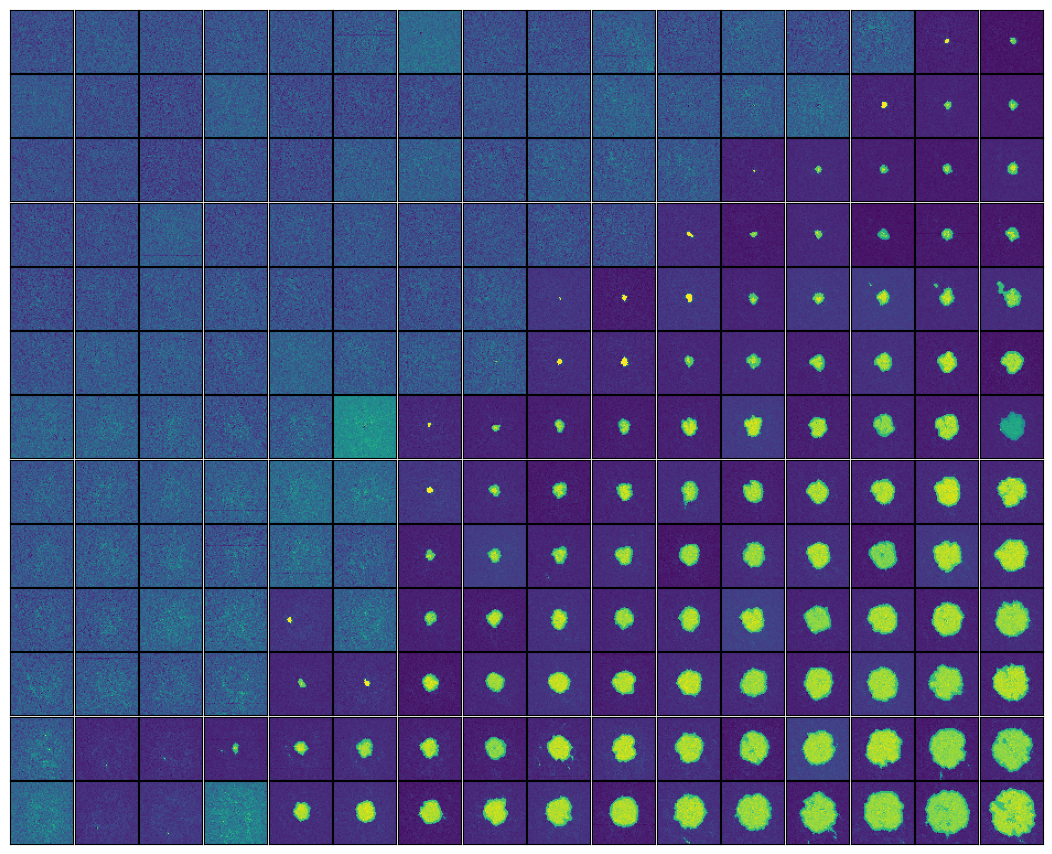

In [ ]:
fig, axes = plt.subplots(13, 16, figsize=(16/1.2, 13/1.2),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.02, wspace=0.02))

for ax, i in zip(axes.flat, range(count_imgs)):
    ax.imshow(pha_140[i,], origin = "lower")